In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [6]:
dataframe = pd.read_csv(r"indicadores_s_CLASE.csv")
dataframe

,SUB,SUBM,AT,VERB,VERBM,OBJ,IOBJ,TIME,MANNER,CAUSE,...,SUBJECT,MATTER,CONCESSION,QUANTITY,OWNERCHIP,DOUBT,AC,RC,PC,CLASS
0,0.612870,0.699488,0.000000,0.289010,0.308542,0.187401,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0,0,0.000000,entailment
1,1.000000,0.365166,0.000000,0.360803,0.000000,0.342251,0.000000,0.405609,0.243046,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0,0,0.000000,contradiction
2,0.258252,0.419582,0.000000,0.252164,0.454779,0.164790,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0,0,0.092362,contradiction
3,1.000000,0.172891,0.000000,0.459732,0.150815,0.329154,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0,0,0.000000,neutral
4,0.057300,0.177652,0.000000,0.120490,0.399333,0.281360,0.151358,0.000000,0.141558,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0,0,0.118482,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0.565856,0.244590,0.208130,1.000000,0.514147,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0,0,0.000000,entailment
90,1.000000,0.295241,0.077744,0.360753,0.415481,0.525837,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0,0,0.000000,entailment
91,0.162082,0.195108,0.000000,0.198153,0.334516,0.271201,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0,0,0.000000,contradiction
92,1.000000,0.354561,0.000000,0.577761,0.000000,0.214616,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0,0,0.000000,contradiction


In [7]:
dataframe.describe()

,SUB,SUBM,AT,VERB,VERBM,OBJ,IOBJ,TIME,MANNER,CAUSE,...,INSTRUMENT,SUBJECT,MATTER,CONCESSION,QUANTITY,OWNERCHIP,DOUBT,AC,RC,PC
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,...,94.000000,94.000000,94.000000,94.000000,94.000000,94.0,94.000000,94.0,94.0,94.000000
mean,0.691083,0.258229,0.097545,0.431980,0.201532,0.267819,0.056920,0.039276,0.049525,0.003442,...,0.009735,0.004630,0.007094,0.002475,0.012154,0.0,0.001404,0.0,0.0,0.092069
std,0.309198,0.218306,0.159915,0.265732,0.182622,0.238249,0.135148,0.121884,0.106708,0.023491,...,0.044987,0.032905,0.043275,0.017030,0.068234,0.0,0.012049,0.0,0.0,0.137506
min,0.057300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
25%,0.430410,0.148920,0.000000,0.256842,0.000000,0.123992,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
50%,0.720793,0.224595,0.000000,0.349694,0.204293,0.245468,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
75%,1.000000,0.351272,0.176729,0.476477,0.330155,0.344584,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.156945
max,1.000000,1.000000,1.000000,1.000000,0.792894,1.000000,0.813580,0.535779,0.458582,0.168459,...,0.305195,0.280814,0.365020,0.131917,0.449604,0.0,0.115875,0.0,0.0,0.626134


In [8]:
print(dataframe.groupby('CLASS').size())

CLASS
contradiction    27
entailment       41
neutral          26
dtype: int64


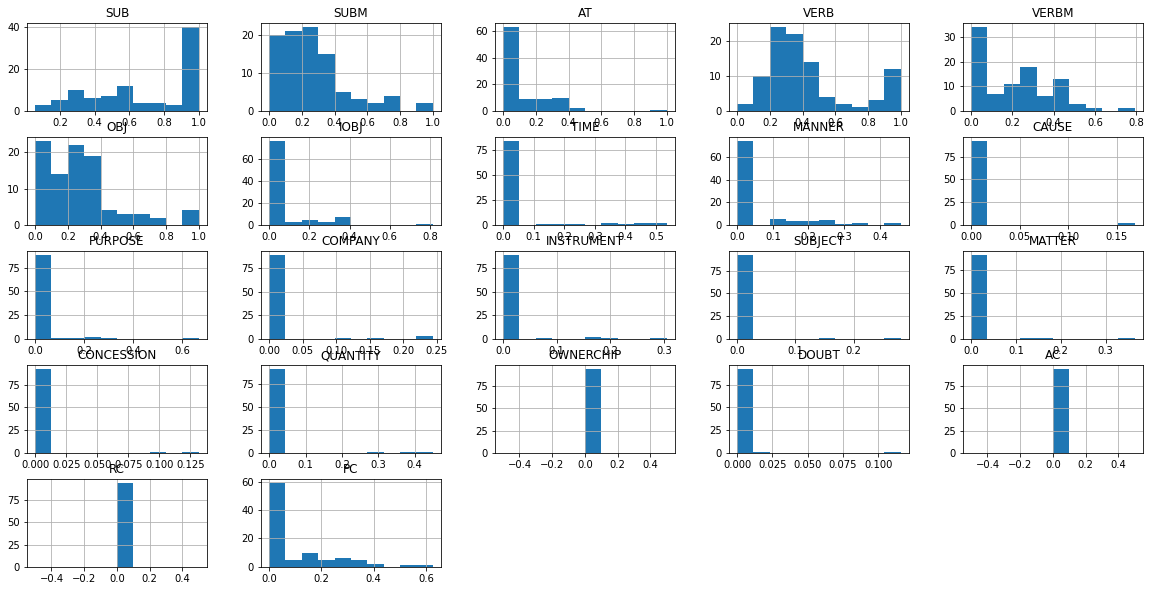

In [9]:
dataframe.hist(figsize=(20,10))
plt.show()

/home/david/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


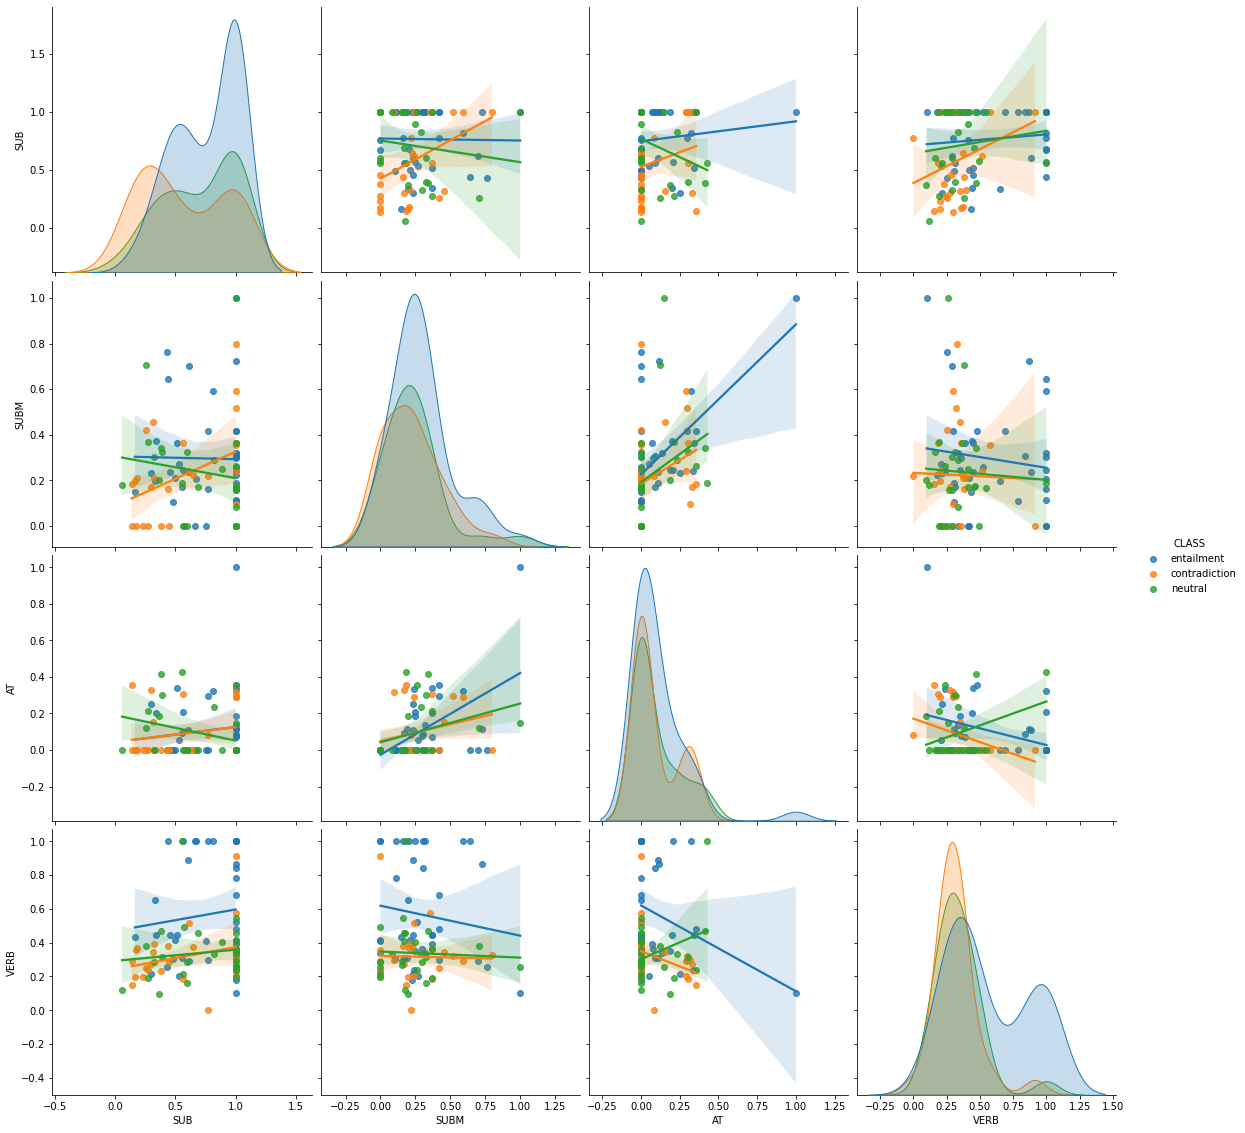

In [10]:
sb.pairplot(dataframe.dropna(), hue='CLASS',size=4,vars=["SUB", "SUBM","AT","VERB"],kind='reg')

In [11]:
X = np.array(dataframe.drop(['CLASS'],1))
X_test = np.array(dataframe.drop(['CLASS'],1))
y = np.array(dataframe['CLASS'])
y_test =np.array(dataframe['CLASS'])
X.shape

/tmp/ipykernel_65525/1802400925.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dataframe.drop(['CLASS'],1))
/tmp/ipykernel_65525/1802400925.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = np.array(dataframe.drop(['CLASS'],1))


(94, 22)

In [12]:
y_test

array(['entailment', 'contradiction', 'contradiction', 'neutral',
       'neutral', 'neutral', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'contradiction', 'neutral',
       'neutral', 'entailment', 'contradiction', 'contradiction',
       'entailment', 'entailment', 'entailment', 'neutral',
       'contradiction', 'entailment', 'neutral', 'entailment',
       'entailment', 'entailment', 'neutral', 'contradiction',
       'contradiction', 'entailment', 'contradiction', 'neutral',
       'entailment', 'neutral', 'neutral', 'entailment', 'neutral',
       'neutral', 'contradiction', 'entailment', 'neutral', 'neutral',
       'entailment', 'contradiction', 'neutral', 'entailment',
       'entailment', 'neutral', 'entailment', 'contradiction',
       'entailment', 'entailment', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'entailment', 'entailment', 'contradiction',
       'entailment', 'entailment', 'contradiction', 'entailment',
       'c

In [13]:
y

array(['entailment', 'contradiction', 'contradiction', 'neutral',
       'neutral', 'neutral', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'contradiction', 'neutral',
       'neutral', 'entailment', 'contradiction', 'contradiction',
       'entailment', 'entailment', 'entailment', 'neutral',
       'contradiction', 'entailment', 'neutral', 'entailment',
       'entailment', 'entailment', 'neutral', 'contradiction',
       'contradiction', 'entailment', 'contradiction', 'neutral',
       'entailment', 'neutral', 'neutral', 'entailment', 'neutral',
       'neutral', 'contradiction', 'entailment', 'neutral', 'neutral',
       'entailment', 'contradiction', 'neutral', 'entailment',
       'entailment', 'neutral', 'entailment', 'contradiction',
       'entailment', 'entailment', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'entailment', 'entailment', 'contradiction',
       'entailment', 'entailment', 'contradiction', 'entailment',
       'c

In [14]:
model = linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X,y)

LogisticRegression(C=0.1)

In [15]:
model.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [16]:
model.decision_function(X)

array([[-0.10220066,  0.27003072, -0.16783006],
       [-0.20382571,  0.33808944, -0.13426373],
       [ 0.02186812,  0.12806366, -0.14993178],
       [-0.20583673,  0.36999963, -0.1641629 ],
       [ 0.11408746, -0.00715611, -0.10693135],
       [-0.24050777,  0.5208497 , -0.28034193],
       [-0.31414757,  0.56861606, -0.25446849],
       [-0.08451062,  0.25191559, -0.16740498],
       [-0.16778947,  0.30441428, -0.13662481],
       [ 0.03085299,  0.0937174 , -0.12457039],
       [-0.23309421,  0.5098728 , -0.2767786 ],
       [ 0.0645431 ,  0.06895475, -0.13349785],
       [-0.16085876,  0.24969667, -0.08883791],
       [ 0.00209674,  0.15250764, -0.15460438],
       [-0.33934349,  0.59851511, -0.25917162],
       [-0.13369397,  0.24768341, -0.11398945],
       [-0.04999756,  0.12080491, -0.07080735],
       [-0.26283215,  0.52522401, -0.26239186],
       [-0.23684953,  0.3935312 , -0.15668167],
       [-0.21110023,  0.37501664, -0.16391641],
       [-0.1954483 ,  0.35422629, -0.158

In [17]:
labels=np.array(['SUB', 'SUBM', 'AT', 'VERB', 'VERBM', 'OBJ', 'IOBJ',
       'TIME', 'MANNER', 'CAUSE', 'PURPOSE', 'COMPANY', 'INSTRUMENT',
       'SUBJECT', 'MATTER', 'CONCESSION', 'QUANTITY', 'OWNERCHIP', 'DOUBT',
       'AC', 'RC', 'PC'])

In [18]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [19]:
contradiction=model.coef_[0]
entailment=model.coef_[1]
neutral=model.coef_[2]

In [20]:
print("Contradiction ",np.argmax(contradiction),labels[np.argmax(contradiction)],np.argmin(contradiction),labels[np.argmin(contradiction)])
print("Entailment ",np.argmax(entailment),labels[np.argmax(entailment)],np.argmin(entailment),labels[np.argmin(entailment)])
print("Neutral ",np.argmax(neutral),labels[np.argmax(neutral)],np.argmin(neutral),labels[np.argmin(neutral)])

Contradiction  4 VERBM 0 SUB
Entailment  3 VERB 21 PC
Neutral  21 PC 3 VERB


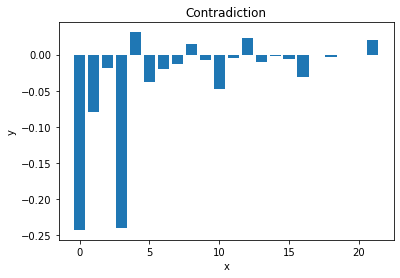

In [21]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,22,1)
y_v = contradiction

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contradiction')
plt.show()

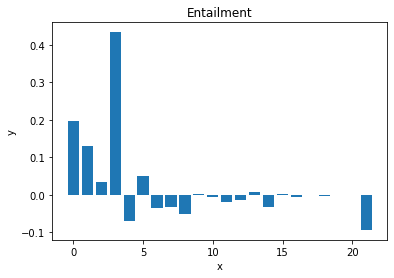

In [22]:
x_v = np.arange(0,22,1)
y_v = entailment

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Entailment')
plt.show()

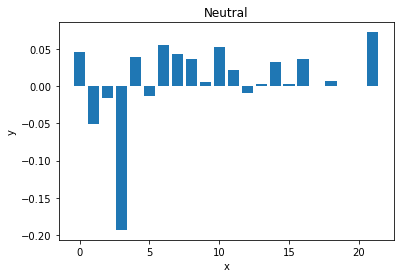

In [23]:
x_v = np.arange(0,22,1)
y_v = neutral

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neutral')
plt.show()

In [24]:
predictions = model.predict(X)
print(predictions)

['entailment' 'entailment' 'entailment' 'entailment' 'contradiction'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'contradiction' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'en

In [25]:
y

array(['entailment', 'contradiction', 'contradiction', 'neutral',
       'neutral', 'neutral', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'contradiction', 'neutral',
       'neutral', 'entailment', 'contradiction', 'contradiction',
       'entailment', 'entailment', 'entailment', 'neutral',
       'contradiction', 'entailment', 'neutral', 'entailment',
       'entailment', 'entailment', 'neutral', 'contradiction',
       'contradiction', 'entailment', 'contradiction', 'neutral',
       'entailment', 'neutral', 'neutral', 'entailment', 'neutral',
       'neutral', 'contradiction', 'entailment', 'neutral', 'neutral',
       'entailment', 'contradiction', 'neutral', 'entailment',
       'entailment', 'neutral', 'entailment', 'contradiction',
       'entailment', 'entailment', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'entailment', 'entailment', 'contradiction',
       'entailment', 'entailment', 'contradiction', 'entailment',
       'c

In [26]:
X

array([[0.61287045, 0.69948828, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.36516631, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25825214, 0.41958177, 0.        , ..., 0.        , 0.        ,
        0.09236178],
       ...,
       [0.16208184, 0.19510752, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.35456064, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14319158, 0.18337849, 0.35559046, ..., 0.        , 0.        ,
        0.        ]])

In [27]:
model.score(X,y)

0.4574468085106383

In [28]:
validation_size = 0.10
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size)

In [29]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.454167 (0.225928)


In [30]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.6


In [31]:
print(confusion_matrix(Y_validation, predictions))

[[6 0]
 [4 0]]


In [32]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

  entailment       0.60      1.00      0.75         6
     neutral       0.00      0.00      0.00         4

    accuracy                           0.60        10
   macro avg       0.30      0.50      0.37        10
weighted avg       0.36      0.60      0.45        10



/home/david/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
#X_new = pd.DataFrame()
#model.predict(X_new)

# Valores ShapLey

In [30]:
import sklearn
import shap
shap.initjs()

In [31]:
li=dataframe.columns
li=li.to_list()

In [32]:
explainer = shap.Explainer(
    model, X_train
)
shap_values = explainer(X_test)

In [33]:
shap_values

.values =
array([[[ 2.03647829e-02, -1.61493865e-02, -4.21539643e-03],
        [ 3.31204541e-02, -1.86630613e-02, -1.44573928e-02],
        [ 2.46379002e-02, -4.94894123e-02,  2.48515121e-02],
        ...,
        [-6.30715998e-22,  1.07889768e-21, -4.48181687e-22],
        [-6.30715998e-22,  1.07889768e-21, -4.48181687e-22],
        [ 3.88921142e-02,  2.37541324e-02, -6.26462467e-02]],

       [[-7.07623013e-02,  5.61148997e-02,  1.46474016e-02],
        [-1.03289507e-02,  5.82026559e-03,  4.50868507e-03],
        [ 2.46379002e-02, -4.94894123e-02,  2.48515121e-02],
        ...,
        [-6.30715998e-22,  1.07889768e-21, -4.48181687e-22],
        [-6.30715998e-22,  1.07889768e-21, -4.48181687e-22],
        [ 3.88921142e-02,  2.37541324e-02, -6.26462467e-02]],

       [[ 1.03838992e-01, -8.23449002e-02, -2.14940920e-02],
        [-3.25696703e-03,  1.83526999e-03,  1.42169705e-03],
        [ 2.46379002e-02, -4.94894123e-02,  2.48515121e-02],
        ...,
        [-6.30715998e-22,  1.078

In [34]:
shap_values.shape

(94, 22, 3)

In [35]:
X_train.shape

(84, 22)

In [36]:
X_test.shape

(94, 22)

In [37]:
shap_values

.values =
array([[[ 2.03647829e-02, -1.61493865e-02, -4.21539643e-03],
        [ 3.31204541e-02, -1.86630613e-02, -1.44573928e-02],
        [ 2.46379002e-02, -4.94894123e-02,  2.48515121e-02],
        ...,
        [-6.30715998e-22,  1.07889768e-21, -4.48181687e-22],
        [-6.30715998e-22,  1.07889768e-21, -4.48181687e-22],
        [ 3.88921142e-02,  2.37541324e-02, -6.26462467e-02]],

       [[-7.07623013e-02,  5.61148997e-02,  1.46474016e-02],
        [-1.03289507e-02,  5.82026559e-03,  4.50868507e-03],
        [ 2.46379002e-02, -4.94894123e-02,  2.48515121e-02],
        ...,
        [-6.30715998e-22,  1.07889768e-21, -4.48181687e-22],
        [-6.30715998e-22,  1.07889768e-21, -4.48181687e-22],
        [ 3.88921142e-02,  2.37541324e-02, -6.26462467e-02]],

       [[ 1.03838992e-01, -8.23449002e-02, -2.14940920e-02],
        [-3.25696703e-03,  1.83526999e-03,  1.42169705e-03],
        [ 2.46379002e-02, -4.94894123e-02,  2.48515121e-02],
        ...,
        [-6.30715998e-22,  1.078

TypeError: only integer scalar arrays can be converted to a scalar index

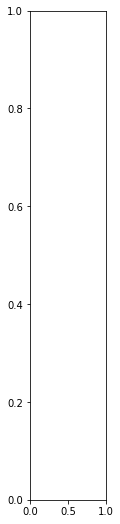

In [38]:
shap.summary_plot(shap_values,X_train,max_display=10)

In [ ]:
shap.plots.waterfall(shap_values.values)

TypeError: The waterfall plot requires an `Explanation` object as the `shap_values` argument.